In [27]:
from torch.nn import BCEWithLogitsLoss
import torch
import numpy as np
from func.network import VoxResNet, CellSegNet_basic_lite_w_groupnorm, CellSegNet_basic_edge_gated_IV
import matplotlib.pyplot as plt
import torch.nn as nn

In [28]:
load_path = 'output/model_HMS_epoch_499.pkl'
#load_path = 'output/model_HMS_delete_fake_cells.pkl'

# init model
model=CellSegNet_basic_lite_w_groupnorm(input_channel=1, n_classes=3, output_func = "softmax")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

checkpoint = torch.load(load_path)
model.load_state_dict(checkpoint['model_state_dict'], strict=False)

<All keys matched successfully>

In [29]:
test_img = np.load("data/CellSeg_dataset/HMS_processed/raw/135.npy")

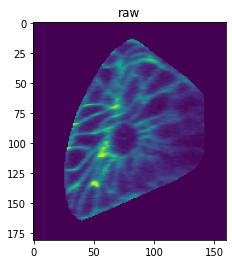

In [30]:
plt.figure()
plt.title("raw")
plt.imshow(test_img[:,150,:])

In [31]:
# test_img_cropped = test_img[60:124, 100:164, 40:104]
test_img_cropped = test_img[60:124, 100:164, 40:104]

In [32]:
raw_img_crop=torch.from_numpy(test_img_cropped).float().to(device)
raw_img_crop = torch.unsqueeze(raw_img_crop, 0)
raw_img_crop = torch.unsqueeze(raw_img_crop, 0)
print(raw_img_crop.shape)
output_model = model(raw_img_crop)

torch.Size([1, 1, 64, 64, 64])


In [33]:
output_model = output_model.detach().numpy()

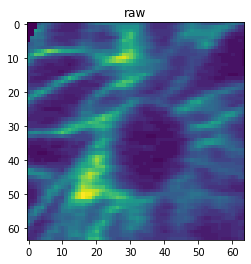

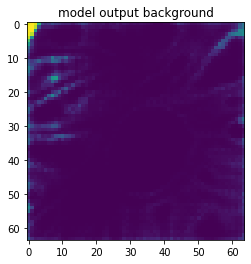

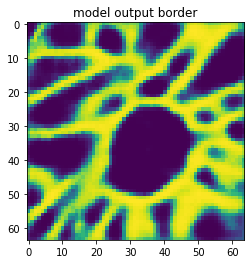

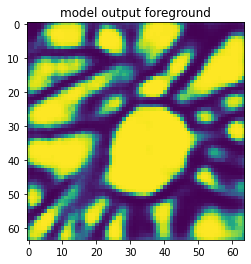

In [34]:
plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[:,50,:])

plt.figure()
plt.title("model output background")
plt.imshow(output_model[0,0,:,50,:])

plt.figure()
plt.title("model output border")
plt.imshow(output_model[0,1,:,50,:])

plt.figure()
plt.title("model output foreground")
plt.imshow(output_model[0,2,:,50,:])

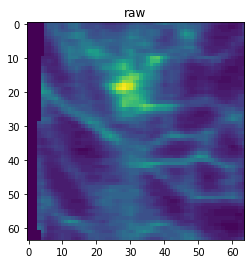

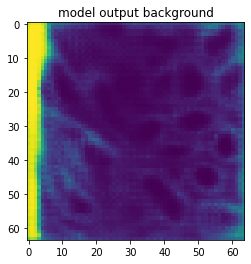

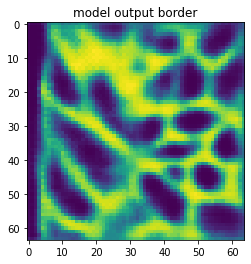

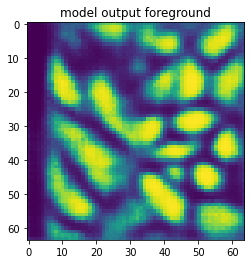

In [35]:
plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[0,:,:])

plt.figure()
plt.title("model output background")
plt.imshow(output_model[0,0,0,:,:])

plt.figure()
plt.title("model output border")
plt.imshow(output_model[0,1,0,:,:])

plt.figure()
plt.title("model output foreground")
plt.imshow(output_model[0,2,0,:,:])

In [36]:
from func.dataset_preprocess import process_one_cuboid_with_all_edges


background_mask = np.load('data/CellSeg_dataset/HMS_processed/segmentation/135/135_background_3d_mask.npy')
foreground_mask = np.load('data/CellSeg_dataset/HMS_processed/segmentation/135/135_foreground_3d_mask.npy')
boundary_mask = np.load('data/CellSeg_dataset/HMS_processed/segmentation/135/135_boundary_3d_mask.npy')

background_mask_cropped = background_mask[60:124, 100:164, 40:104]
foreground_mask_cropped = foreground_mask[60:124, 100:164, 40:104]
boundary_mask_cropped = boundary_mask[60:124, 100:164, 40:104]

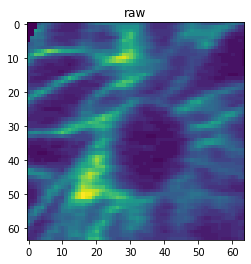

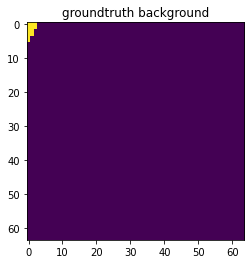

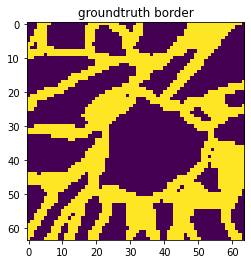

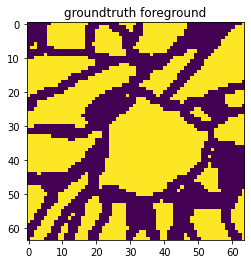

In [37]:
plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[:,50,:])

plt.figure()
plt.title("groundtruth background")
plt.imshow(background_mask_cropped[:,50,:])

plt.figure()
plt.title("groundtruth border")
plt.imshow(boundary_mask_cropped[:,50,:])

plt.figure()
plt.title("groundtruth foreground")
plt.imshow(foreground_mask_cropped[:,50,:])


In [38]:
background_mask.shape

(181, 331, 160)

In [39]:
np.unique(foreground_mask_cropped[:,50,:])

array([0., 1.], dtype=float32)